<a href="https://colab.research.google.com/github/HO94/InsightMining_HonGong/blob/main/07_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실곡선

fit() 메서드는 History 클래스 객체를 반환  
History 객체에는 훈련 과정에서 계산한 지표(손실, 정확도) 값이 저장

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = "relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = "softmax"))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6701 - accuracy: 0.7654
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4026 - accuracy: 0.8537
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3493 - accuracy: 0.8735
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3334 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8889


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### 손실값

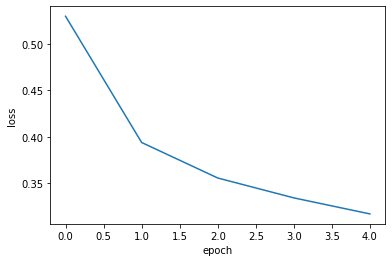

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 정확도

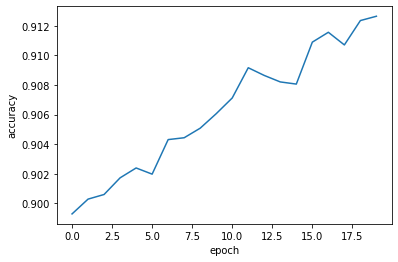

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

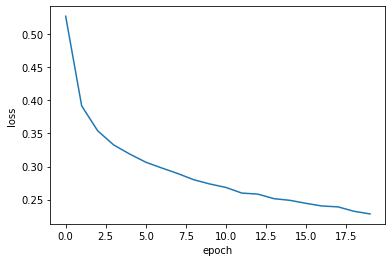

In [ ]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증손실

In [ ]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


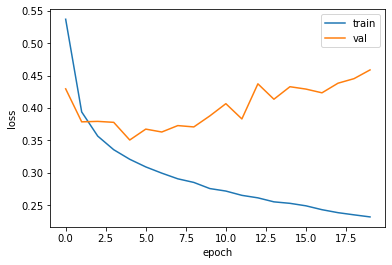

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합을 막기 위해 Adam

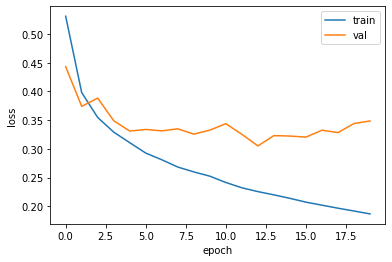

In [ ]:
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막음  
신경망에만 존재하는 규제 방법  
은닉층 다음에 드롭아웃 층 추가  

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**훈련이 끝난 뒤에는 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야함**  
텐서플로와 케라스는 모델을 평가, 예측에 사용할 때에는 자동으로 드롭아웃으로 적용하지 않음. 

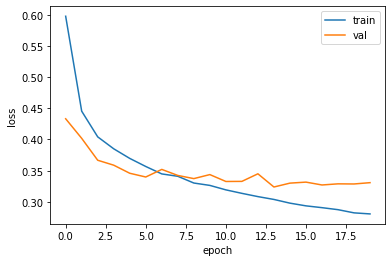

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원

에포크 횟수를 10으로 지정하고 모델 훈련

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))

케라스 모델은 훈련된 모델의 **파라미터**를 저장하는 save_weights() 메서드 제공 

In [ ]:
model.save_weights("model-weights.h5")

**모델 구조**와 **모델 파라미터**를 함께 저장하는 save() 메서드 제공

In [ ]:
model.save("model-whole.h5")

In [ ]:
# 두 모델 확인
!ls -al *.h5

-rw-r--r-- 1 root root 981776 May  5 08:52 best-model.h5
-rw-r--r-- 1 root root 332480 May  5 08:31 model-weights.h5
-rw-r--r-- 1 root root 981776 May  5 08:32 model-whole.h5


훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5파일에서 훈련된 모델 파라미터를 사용

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)  # axis = -1 은 배열을 마지막 차원, 2차원(행, 열)이기 때문에 1과 같음.
print(np.mean(val_labels == val_target))

0.8808333333333334


In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8808


[0.3279465436935425, 0.8808333277702332]

# 콜백

훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체  
ModelCheckpoint 콜백은 최상의 검증 점수를 만드는 모델을 저장  

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb]) # 가장 낮은 손실값 저장

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7694 - accuracy: 0.7386 - val_loss: 0.4317 - val_accuracy: 0.8463
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8363 - val_loss: 0.3858 - val_accuracy: 0.8609
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8494 - val_loss: 0.3702 - val_accuracy: 0.8608
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3795 - accuracy: 0.8630 - val_loss: 0.3509 - val_accuracy: 0.8720
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3675 - accuracy: 0.8637 - val_loss: 0.3400 - val_accuracy: 0.8738
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3477 - accuracy: 0.8703 - val_loss: 0.3458 - val_accuracy: 0.8729
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.8780 - val_loss: 0.3379 - val_accuracy:

best-model.h5 에 최상의 검증 점수를 낸 모델이 저장  
이 모델을 load_model() 함수로 읽어서 예측 진행

In [ ]:
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8845


[0.32918626070022583, 0.8845000267028809]

### 조기종료

검증 점수가 상승하기 시작하면서 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없음.  
과대적합이 시작되기 전에 훈련을 미리 중지하는 것  
에포크가 충분히 커도 손실이 증가하는 시점에서 중지시켜줌  

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)  # patience : 손실이 증가하는 횟수(손실이 2 에포크 증가하면 중지), restore_best_weights : 가장 손실이 낮았던 가중치로 돌아가라

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)  # 몇 번째 에포크에서 멈췄는지 확인할 수 있음, 10번째 에포크에서 멈췄다 = 8번째 에포크가 최적이다(epoch = 7)

9


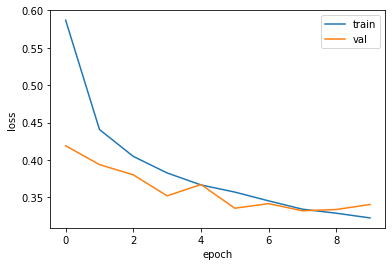

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8771


[0.3321729600429535, 0.8770833611488342]